In [5]:
# Kaggle competition from https://www.kaggle.com/competitions/playground-series-s3e17/data
# Import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Importing training data
training_setDF = pd.read_csv('./train.csv')
training_setDF

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


From forum blog https://www.kaggle.com/competitions/playground-series-s3e17/discussion/416765

The domain knowledge of this problem is explained like:

TWF(Tool Wear Failure binary feature) - indicating industrial tools need to be replaced <br>
HDF(Heat Dissipation Failure) - failure in heat dissipation during the production process <br>
PWF(Power Failure) - Power supplied not fit to production process <br>
OSF (Overstain Failure) - Failure from product overstrain -> high tension and load <br>
RNF (Random Failure) - Randomly fail <br>



In [24]:
# Importing test dataset
testing_setDF = pd.read_csv('./test.csv')
testing_setDF

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


Firstly, duplicates are checked. Then, the columns and their types are examined to have a brief overview of the data properties and we should ascertain that there are no null values in the columns

In [48]:
# Check duplicates. For each duplicated row, +1
training_setDF.duplicated().sum()

0

In [25]:
training_setDF.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [51]:
# isnull and isna are the same
training_setDF.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Failure Cause Count        0
dtype: int64

At the first glance, I suspect that the type of machines might have an influence on the result. So, let's see what the values are. There are three types of machines where I suspect it to be:

    L : 'Low',
    M : 'Medium',
    H : 'High'


In [26]:
uniqueTypes = training_setDF["Type"].unique()
print(uniqueTypes)
numRows = dict()

['L' 'M' 'H']


In [28]:
typeH = training_setDF[training_setDF["Type"] == 'H']
numRows['H'] = typeH.shape[0]
typeH.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000
mean,67582.858904,299.789219,309.910064,1521.784041,40.261840,104.949793,0.013000,0.001905,0.004595,0.001905,0.001345,0.002017
std,39255.309172,1.962823,1.437833,143.797128,8.684604,63.527394,0.113281,0.043609,0.067633,0.043609,0.036649,0.044871
min,26.000000,295.300000,305.800000,1183.000000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33321.000000,298.150000,308.800000,1429.000000,34.300000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67650.000000,299.800000,309.800000,1488.000000,40.600000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100901.500000,301.000000,310.900000,1587.000000,46.300000,158.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136425.000000,304.400000,313.600000,2833.000000,76.600000,246.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
typeM = training_setDF[training_setDF["Type"] == 'M']
numRows['M'] = typeM.shape[0]
typeM.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000,32152.000000
mean,68123.836495,299.897305,309.943969,1520.019781,40.365209,105.133398,0.013592,0.001680,0.005785,0.002644,0.001275,0.002426
std,39402.360040,1.916732,1.392724,141.434784,8.549229,63.420121,0.115790,0.040948,0.075840,0.051350,0.035688,0.049195
min,1.000000,295.300000,305.800000,1183.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34069.750000,298.275000,308.800000,1430.000000,34.600000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68096.500000,300.000000,309.900000,1494.000000,40.600000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102435.500000,301.300000,310.900000,1582.000000,46.100000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136424.000000,304.400000,313.800000,2886.000000,76.400000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
typeL = training_setDF[training_setDF["Type"] == 'L']
numRows['L'] = typeL.shape[0]
typeL.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000,95354.000000
mean,68303.462519,299.858016,309.942995,1520.300124,40.351180,104.113996,0.016727,0.001479,0.005002,0.002360,0.005107,0.002223
std,39389.352612,1.833490,1.377558,137.329374,8.469067,64.186811,0.128248,0.038426,0.070551,0.048519,0.071283,0.047100
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34192.250000,298.300000,308.700000,1433.000000,34.700000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68304.500000,300.000000,310.100000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102396.750000,301.100000,310.900000,1578.000000,46.100000,158.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,251.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can clearly see from the graph below that the distribution of machine types are not equal

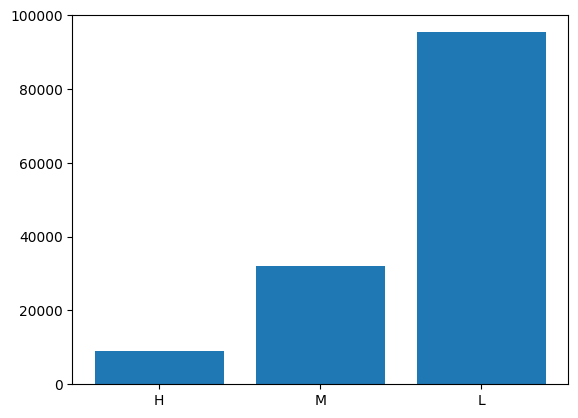

In [34]:
plt.bar(*zip(*numRows.items()))
plt.show()

We can try to comprehend the code of failues and see if one machine can have two cause of failures. We find out that 129 machines have more than 1 cause of failure

In [44]:
training_setDF["Failure Cause Count"] = training_setDF["TWF"] + training_setDF["HDF"] + training_setDF["PWF"] + training_setDF["OSF"] + training_setDF["RNF"]
training_setDF[training_setDF["Failure Cause Count"] > 1].shape[0]

129

Preprocess Type attributes by changing it to integers

In [10]:
training_setDF['Type'].replace('L', 0, inplace=True)
training_setDF['Type'].replace('M', 1, inplace=True)
training_setDF['Type'].replace('H', 2, inplace=True)

training_setDF[["id", "Air temperature [K]", "Type", "Process temperature [K]", "Torque [Nm]", "Tool wear [min]"]]


,id,Air temperature [K],Type,Process temperature [K],Torque [Nm],Tool wear [min]
0,0,300.6,0,309.6,36.1,140
1,1,302.6,1,312.1,29.1,200
2,2,299.3,0,308.5,26.5,25
3,3,301.0,0,310.9,44.3,197
4,4,298.0,1,309.0,35.4,34
...,...,...,...,...,...,...
136424,136424,300.1,1,311.4,37.5,210
136425,136425,297.5,2,308.5,49.1,2
136426,136426,300.5,0,311.8,38.5,214
136427,136427,301.7,0,310.9,46.3,42


In [11]:
testing_setDF['Type'].replace('L', 0, inplace=True)
testing_setDF['Type'].replace('M', 1, inplace=True)
testing_setDF['Type'].replace('H', 2, inplace=True)

testing_setDF[["id", "Air temperature [K]", "Type", "Process temperature [K]", "Torque [Nm]", "Tool wear [min]"]]

,id,Air temperature [K],Type,Process temperature [K],Torque [Nm],Tool wear [min]
0,136429,302.3,0,311.5,38.0,60
1,136430,301.7,0,311.0,28.8,17
2,136431,301.3,0,310.4,37.7,96
3,136432,300.1,1,309.6,47.6,5
4,136433,303.4,1,312.3,41.3,114
...,...,...,...,...,...,...
90949,227378,302.3,0,311.4,40.4,15
90950,227379,297.9,0,309.8,33.8,31
90951,227380,295.6,0,306.2,41.4,187
90952,227381,298.1,0,307.8,40.3,69


In [12]:
model = RandomForestClassifier(n_estimators=50, max_depth=5)
model.fit(training_setDF[["Air temperature [K]", "Type", "Process temperature [K]", "Torque [Nm]", "Tool wear [min]"]], training_setDF["Machine failure"])

RandomForestClassifier(max_depth=5, n_estimators=50)

In [13]:
result = model.predict(testing_setDF[["Air temperature [K]", "Type", "Process temperature [K]", "Torque [Nm]", "Tool wear [min]"]])
result.shape

(90954,)

In [14]:
output = pd.DataFrame({'Id': testing_setDF.id, 'Machine failure': result})
output.to_csv('./results.csv')
output

,Id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
result = reg.predict(np.array([[1, 5]]))
result

array([14.])

In [16]:
training_setDFNumpy = training_setDF[["Air temperature [K]", "Process temperature [K]", "Torque [Nm]", "Tool wear [min]"]].to_numpy()
result_trainingNumpy = training_setDF[["Machine failure"]].to_numpy()

training_setDFNumpy

array([[300.6, 309.6,  36.1, 140. ],
       [302.6, 312.1,  29.1, 200. ],
       [299.3, 308.5,  26.5,  25. ],
       ...,
       [300.5, 311.8,  38.5, 214. ],
       [301.7, 310.9,  46.3,  42. ],
       [296.9, 308.1,  39.3, 229. ]])

In [17]:
# Using linear Regression

reg = LinearRegression().fit(training_setDFNumpy, result_trainingNumpy)

reg.coef_


array([[ 0.01028505, -0.00903535,  0.00214319,  0.00010816]])

In [18]:
# Predict using Linear Linear Regression
testing_setDFNumpy = testing_setDF[["Air temperature [K]", "Process temperature [K]", "Torque [Nm]", "Tool wear [min]"]].to_numpy()
testResult = reg.predict(testing_setDFNumpy)

In [19]:
testResult = np.around(testResult, decimals=2).flatten()
testResult[testResult <= 0] = 0
print(testResult)

output = pd.DataFrame({'Id': testing_setDF.id, 'Machine failure': testResult})
output

[0.02 0.   0.02 ... 0.02 0.01 0.02]


,Id,Machine failure
0,136429,0.02
1,136430,0.00
2,136431,0.02
3,136432,0.03
4,136433,0.03
...,...,...
90949,227378,0.02
90950,227379,0.00
90951,227380,0.02
90952,227381,0.01


In [20]:
output.to_csv('resultsLinearRegre.csv', index=False)